In [1]:
#Import All The Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("icu_mortality.csv")
df

,gender,icustay_admit_age,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,...,obesity,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,icustay_id,icustay_expire_flg
0,M,72.00637,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29,N
1,M,68.93134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,41,N
2,M,48.62681,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,89,N
3,F,90.64270,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,62,N
4,M,76.52892,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5362,M,88.09742,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,47373,Y
5363,M,57.78417,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,47381,Y
5364,M,89.24603,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,47325,Y
5365,M,68.48606,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,47394,Y


In [3]:
# Check for null values in the entire dataset
null_values = df.isnull().sum()

# Display the columns with null values and their respective counts
print("Columns with Null Values:")
print(null_values[null_values > 0])

Columns with Null Values:
gender    11
dtype: int64


In [5]:
# Remove rows with any null values
df = df.dropna()

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df)

Cleaned DataFrame:
     gender  icustay_admit_age  congestive_heart_failure  cardiac_arrhythmias  \
0         M           72.00637                         1                    1   
1         M           68.93134                         0                    0   
2         M           48.62681                         0                    0   
3         F           90.64270                         1                    0   
4         M           76.52892                         1                    0   
...     ...                ...                       ...                  ...   
5362      M           88.09742                         0                    0   
5363      M           57.78417                         0                    0   
5364      M           89.24603                         1                    1   
5365      M           68.48606                         0                    0   
5366      M           79.16299                         1                    1   

      va

In [6]:
# Check for null values in the entire dataset
null_values = df.isnull().sum()

# Display the columns with null values and their respective counts
print("Columns with Null Values:")
print(null_values[null_values > 0])

Columns with Null Values:
Series([], dtype: int64)


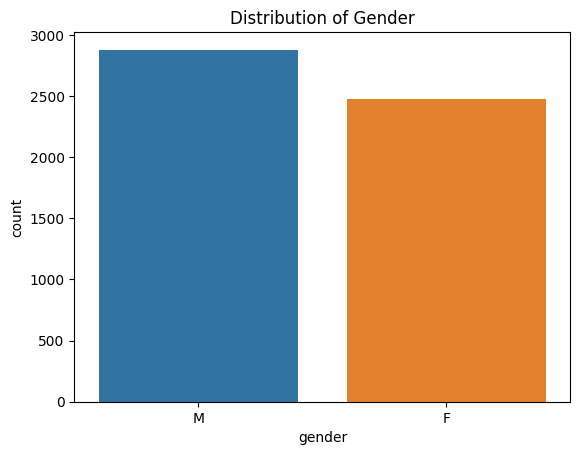

In [7]:
# Visualization for the 'gender' column
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()


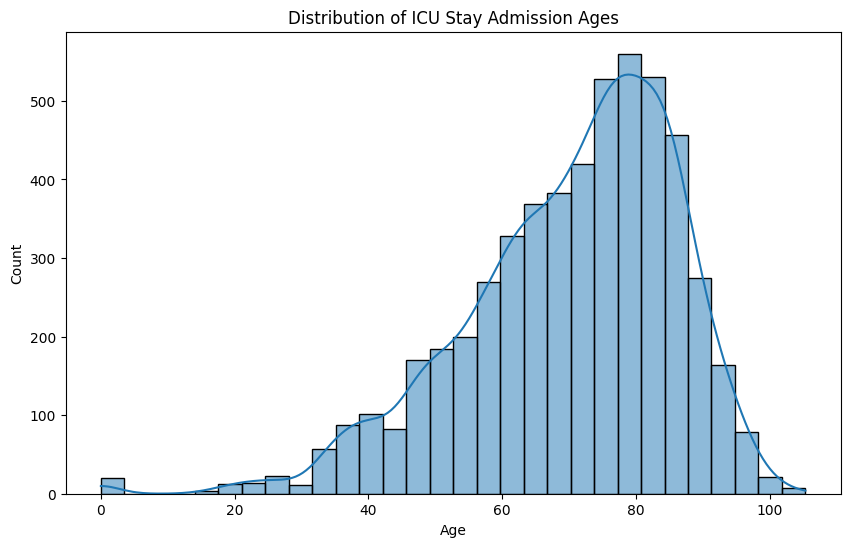

In [8]:
# Visualization for the 'icustay_admit_age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['icustay_admit_age'], bins=30, kde=True)
plt.title('Distribution of ICU Stay Admission Ages')
plt.xlabel('Age')
plt.show()

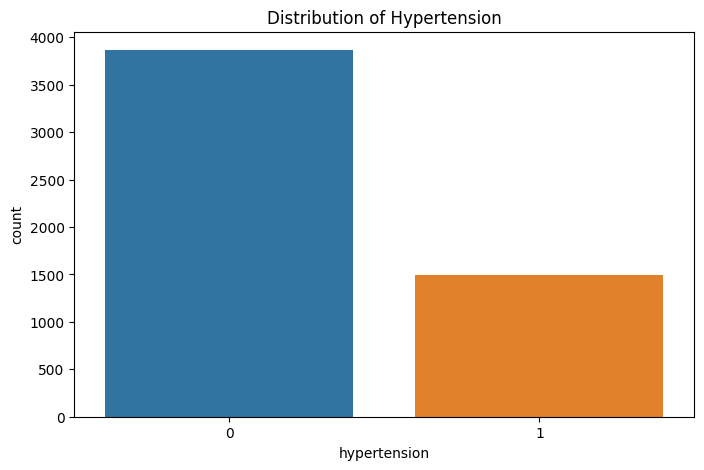

In [10]:
# Visualization for the 'hypertension' column
plt.figure(figsize=(8, 5))
sns.countplot(x='hypertension', data=df)
plt.title('Distribution of Hypertension')
plt.show()

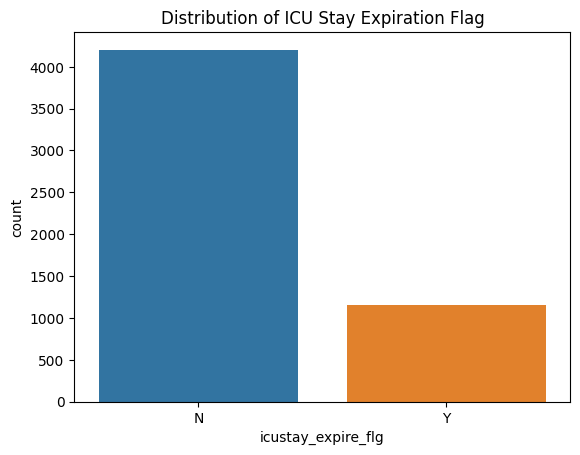

In [11]:
# Visualization for the 'icustay_expire_flg' column
sns.countplot(x='icustay_expire_flg', data=df)
plt.title('Distribution of ICU Stay Expiration Flag')
plt.show()

In [17]:
# Select numerical columns for outlier detection
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    z_scores = stats.zscore(df[column])
    outliers_z = (z_scores > 3) | (z_scores < -3)
    print(f'Number of outliers using Z-score method for {column}: {sum(outliers_z)}')

Number of outliers using Z-score method for icustay_admit_age: 45
Number of outliers using Z-score method for congestive_heart_failure: 0
Number of outliers using Z-score method for cardiac_arrhythmias: 0
Number of outliers using Z-score method for valvular_disease: 0
Number of outliers using Z-score method for pulmonary_circulation: 181
Number of outliers using Z-score method for peripheral_vascular: 449
Number of outliers using Z-score method for hypertension: 0
Number of outliers using Z-score method for paralysis: 65
Number of outliers using Z-score method for other_neurological: 199
Number of outliers using Z-score method for chronic_pulmonary: 0
Number of outliers using Z-score method for diabetes_uncomplicated: 0
Number of outliers using Z-score method for diabetes_complicated: 409
Number of outliers using Z-score method for hypothyroidism: 474
Number of outliers using Z-score method for renal_failure: 0
Number of outliers using Z-score method for liver_disease: 303
Number of ou

In [18]:
# Set the Z-score threshold for outlier removal
z_score_threshold = 3

# Remove outliers using Z-score method for each numeric column
for column in numeric_columns:
    z_scores = stats.zscore(df[column])
    outliers_z = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)
    df = df[~outliers_z]

# Display the cleaned DataFrame without outliers
print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
     gender  icustay_admit_age  congestive_heart_failure  cardiac_arrhythmias  \
0         M           72.00637                         1                    1   
1         M           68.93134                         0                    0   
3         F           90.64270                         1                    0   
4         M           76.52892                         1                    0   
7         M           55.24900                         0                    1   
...     ...                ...                       ...                  ...   
5361      M           81.10085                         0                    1   
5363      M           57.78417                         0                    0   
5364      M           89.24603                         1                    1   
5365      M           68.48606                         0                    0   
5366      M           79.16299                         1                  

In [19]:
# Select numerical columns for outlier detection
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    z_scores = stats.zscore(df[column])
    outliers_z = (z_scores > 3) | (z_scores < -3)
    print(f'Number of outliers using Z-score method for {column}: {sum(outliers_z)}')

Number of outliers using Z-score method for icustay_admit_age: 21
Number of outliers using Z-score method for congestive_heart_failure: 0
Number of outliers using Z-score method for cardiac_arrhythmias: 0
Number of outliers using Z-score method for valvular_disease: 0
Number of outliers using Z-score method for pulmonary_circulation: 0
Number of outliers using Z-score method for peripheral_vascular: 0
Number of outliers using Z-score method for hypertension: 0
Number of outliers using Z-score method for paralysis: 0
Number of outliers using Z-score method for other_neurological: 0
Number of outliers using Z-score method for chronic_pulmonary: 0
Number of outliers using Z-score method for diabetes_uncomplicated: 0
Number of outliers using Z-score method for diabetes_complicated: 0
Number of outliers using Z-score method for hypothyroidism: 0
Number of outliers using Z-score method for renal_failure: 0
Number of outliers using Z-score method for liver_disease: 0
Number of outliers using 

In [20]:
target_column = 'icustay_expire_flg'


In [21]:
X = df.drop(target_column, axis=1)
y = df[target_column]


In [22]:
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='object').columns, drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [24]:
# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
clf.score(X_train,y_train)

1.0

In [27]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred


array(['N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [29]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           N       0.80      0.93      0.86       403
           Y       0.36      0.15      0.21       110

    accuracy                           0.76       513
   macro avg       0.58      0.54      0.53       513
weighted avg       0.70      0.76      0.72       513

